# Task
Build a Random Forest model using the "AirQuality.csv" dataset to analyze air quality, including data preprocessing, model training, evaluation, and feature importance analysis.

## Load Data

### Subtask:
Load the 'AirQuality.csv' dataset into a pandas DataFrame. This will be the foundation for all subsequent modeling steps.


**Reasoning**:
To load the 'AirQuality.csv' dataset, I will first import the pandas library, then use `pd.read_csv()` to load the data into a DataFrame named `df`, and finally display the first 5 rows using `.head()` to verify the load.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/AirQuality.csv')

print("Dataset loaded successfully. First 5 rows:")
print(df.head())

Dataset loaded successfully. First 5 rows:
                                                                                                            Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2            6;1360;150;11                 9;1046;166;1056;113;1692;1268;13 6;48 9;0                                                7578;;                                                                          
10/03/2004;19.00.00;2;1292;112;9 4;955;103;1174;92;1559;972;13 3;47                             7;0  7255;;                                                NaN                                                                          
10/03/2004;20.00.00;2            2;1402;88;9                   0;939;131;1140;114;1555;1074;11  9;54 0;0                                                7502;;                                                                          
10/03/2004;21.00.00;2    

**Reasoning**:
The previous attempt to load the CSV file resulted in a single column because the delimiter was not specified. I will reload the dataset, explicitly setting the separator to ';' to ensure proper column parsing. After reloading, I will display the first 5 rows and check the DataFrame's info to verify the correct data structure and types.



In [ ]:
df = pd.read_csv('/content/AirQuality.csv', sep=';')

print("Dataset reloaded successfully with correct delimiter. First 5 rows:")
print(df.head())

print("\nDataFrame Info:")
df.info()

Dataset reloaded successfully with correct delimiter. First 5 rows:
         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,

**Reasoning**:
The `df.info()` output indicates that several columns contain numerical data but are incorrectly identified as `object` type due to the use of a comma as a decimal separator. Additionally, there are two `Unnamed` columns with all `NaN` values that are irrelevant. To address this, I will convert the relevant 'object' type columns to numeric by replacing commas with periods and dropping the 'Unnamed' columns. After this, I will check the `df.info()` again to confirm the data types have been correctly updated and display the first few rows to confirm the changes.



In [ ]:
columns_to_clean = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']

for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop the 'Unnamed' columns as they contain all NaN values
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'], errors='ignore')

print("Data types cleaned and irrelevant columns dropped. First 5 rows:")
print(df.head())
print("\nDataFrame Info after cleaning:")
df.info()

Data types cleaned and irrelevant columns dropped. First 5 rows:
         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  

## Initial Data Inspection and Preprocessing

### Subtask:
Perform an initial inspection of the dataset to understand its structure, identify missing values, and check data types. Based on this, preprocess the data by handling missing values (e.g., imputation or removal), converting appropriate columns to numerical types, and potentially encoding categorical features for the Random Forest model.


**Reasoning**:
The subtask requires replacing a specific missing value indicator (-200) with `np.nan` across all numerical columns. I will import numpy and then iterate through the numerical columns to perform this replacement. After that, I will convert the 'Date' and 'Time' columns to a single 'DateTime' column.



In [ ]:
import numpy as np

# Replace -200 with NaN across the DataFrame
df.replace(-200, np.nan, inplace=True)

# Combine 'Date' and 'Time' into a single 'DateTime' column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')

print("Replaced -200 with NaN and created 'DateTime' column. First 5 rows:")
print(df.head())
print("\nDataFrame Info after initial cleaning:")
df.info()

Replaced -200 with NaN and created 'DateTime' column. First 5 rows:
         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH            DateTime  
0  1

**Reasoning**:
Following the instructions, I will now impute missing values in the 'DateTime' column using forward fill, and impute missing values in all other numerical columns with their respective means. Then, I will drop the original 'Date' and 'Time' columns, and finally display the head and info of the DataFrame to verify these changes.



In [ ]:
df['DateTime'].ffill(inplace=True)

# Impute missing values in numerical columns with the mean
for col in df.select_dtypes(include=['float64']).columns:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

# Drop original 'Date' and 'Time' columns
df.drop(columns=['Date', 'Time'], inplace=True)

print("Missing values handled and original date/time columns dropped. First 5 rows:")
print(df.head())
print("\nDataFrame Info after handling missing values and dropping columns:")
df.info()

Missing values handled and original date/time columns dropped. First 5 rows:
   CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6       1360.0     150.0      11.9         1046.0    166.0   
1     2.0       1292.0     112.0       9.4          955.0    103.0   
2     2.2       1402.0      88.0       9.0          939.0    131.0   
3     2.2       1376.0      80.0       9.2          948.0    172.0   
4     1.6       1272.0      51.0       6.5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578   
1        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255   
2        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502   
3        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867   
4        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888   

             DateTime  
0 2004-03-10 18:00:00  
1 2

/tmp/ipython-input-3767730048.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DateTime'].ffill(inplace=True)
/tmp/ipython-input-3767730048.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

**Reasoning**:
The previous code block produced `FutureWarning` messages about using `inplace=True` with chained assignments. To address these warnings and ensure future compatibility, I will modify the code to assign the results of `ffill()` and `fillna()` operations back to the DataFrame columns explicitly instead of using `inplace=True`.



**Reasoning**:
The previous attempt to drop 'Date' and 'Time' columns failed with a KeyError because these columns were likely already dropped in a prior successful execution. I will modify the code to check if these columns exist in the DataFrame before attempting to drop them, preventing the KeyError.



In [ ]:
df['DateTime'] = df['DateTime'].ffill()

# Impute missing values in numerical columns with the mean
for col in df.select_dtypes(include=['float64']).columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())

# Drop original 'Date' and 'Time' columns if they exist
columns_to_drop = [col for col in ['Date', 'Time'] if col in df.columns]
if columns_to_drop:
    df.drop(columns=columns_to_drop, inplace=True)

print("Missing values handled and original date/time columns dropped. First 5 rows:")
print(df.head())
print("\nDataFrame Info after handling missing values and dropping columns:")
df.info()

Missing values handled and original date/time columns dropped. First 5 rows:
   CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     2.6       1360.0     150.0      11.9         1046.0    166.0   
1     2.0       1292.0     112.0       9.4          955.0    103.0   
2     2.2       1402.0      88.0       9.0          939.0    131.0   
3     2.2       1376.0      80.0       9.2          948.0    172.0   
4     1.6       1272.0      51.0       6.5          836.0    131.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578   
1        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255   
2        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502   
3        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867   
4        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888   

             DateTime  
0 2004-03-10 18:00:00  
1 2

## Feature Selection and Engineering

### Subtask:
Identify relevant features for the Random Forest model, and create new features from the 'DateTime' column to potentially improve model performance. Define the target variable for the model.


**Reasoning**:
I will define the target variable `y` as 'CO(GT)' and the feature matrix `X` by dropping 'CO(GT)' and 'DateTime'. Then, I will create time-based features from the 'DateTime' column and add them to `X`. Finally, I will display the head and shape of both `X` and `y` to verify the new features and dimensions.



In [ ]:
y = df['CO(GT)']
X = df.drop(columns=['CO(GT)', 'DateTime'])

# Create new time-based features from the 'DateTime' column
X['hour'] = df['DateTime'].dt.hour
X['day_of_week'] = df['DateTime'].dt.dayofweek
X['month'] = df['DateTime'].dt.month
X['day_of_year'] = df['DateTime'].dt.dayofyear

print("First 5 rows of feature matrix X:")
print(X.head())
print("\nFirst 5 rows of target variable y:")
print(y.head())

print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

First 5 rows of feature matrix X:
   PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0       1360.0     150.0      11.9         1046.0    166.0        1056.0   
1       1292.0     112.0       9.4          955.0    103.0        1174.0   
2       1402.0      88.0       9.0          939.0    131.0        1140.0   
3       1376.0      80.0       9.2          948.0    172.0        1092.0   
4       1272.0      51.0       6.5          836.0    131.0        1205.0   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  hour  day_of_week  \
0    113.0        1692.0       1268.0  13.6  48.9  0.7578    18            2   
1     92.0        1559.0        972.0  13.3  47.7  0.7255    19            2   
2    114.0        1555.0       1074.0  11.9  54.0  0.7502    20            2   
3    122.0        1584.0       1203.0  11.0  60.0  0.7867    21            2   
4    116.0        1490.0       1110.0  11.2  59.6  0.7888    22            2   

   month  day_of_year  
0   

## Split Data into Training and Testing Sets

### Subtask:
Divide the preprocessed data into training and testing sets. This is crucial for evaluating the model's performance on unseen data and preventing overfitting. The target variable (what the model will predict) needs to be identified from your assignment tasks.


**Reasoning**:
To prepare the data for model training, I will split the feature matrix X and the target variable y into training and testing sets using `train_test_split` from `sklearn.model_selection`.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7576, 16)
Shape of X_test: (1895, 16)
Shape of y_train: (7576,)
Shape of y_test: (1895,)


## Train Random Forest Model

### Subtask:
Train a Random Forest model using the training dataset. This will involve selecting appropriate hyperparameters for the model (e.g., number of trees, max depth).


**Reasoning**:
To train the Random Forest model, I will import `RandomForestRegressor`, instantiate it with default parameters, and then fit the model using the `X_train` and `y_train` datasets.



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest Regressor model with default hyperparameters
rf_model = RandomForestRegressor(random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully with default hyperparameters.")

Random Forest model trained successfully with default hyperparameters.


## Evaluate Model Performance

### Subtask:
Evaluate the trained Random Forest model's performance on the test set using relevant metrics (e.g., R-squared, MSE, RMSE) and visualize the model's performance.


**Reasoning**:
To evaluate the model's performance, I will first make predictions on the test set, then calculate and print the R-squared, MSE, and RMSE metrics. After that, I will generate a scatter plot to visualize the actual vs. predicted values and include an ideal prediction line.



R-squared: 0.8757
Mean Squared Error (MSE): 0.2196
Root Mean Squared Error (RMSE): 0.4686


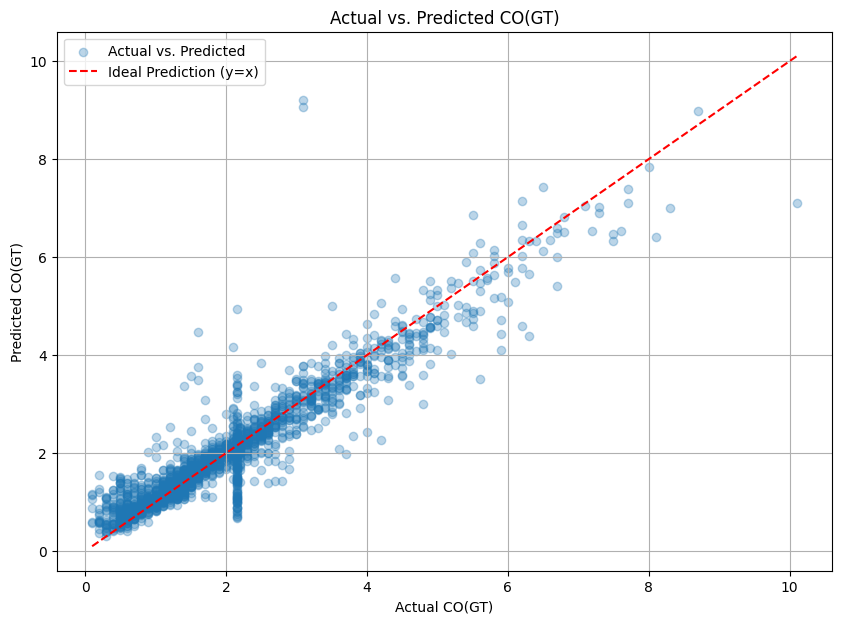

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# 1. Use the trained rf_model to make predictions on the X_test data
y_pred = rf_model.predict(X_test)

# 3. Calculate the R-squared score, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 4. Print the calculated R-squared, MSE, and RMSE values
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# 6. Create a scatter plot of y_test (actual values) against y_pred (predicted values)
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.3, label='Actual vs. Predicted')

# 8. Plot a red dashed line representing the ideal scenario where actual equals predicted values (y=x)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Prediction (y=x)')

# 7. Add a title to the scatter plot
plt.title('Actual vs. Predicted CO(GT)')
plt.xlabel('Actual CO(GT)')
plt.ylabel('Predicted CO(GT)')

# 9. Add a legend to the plot
plt.legend()

# 10. Display the plot
plt.grid(True)
plt.show()


## Feature Importance Analysis

### Subtask:
Analyze the feature importances from the trained Random Forest model to understand which variables contribute most to the predictions. This insight can be visualized as a bar chart with legends.


**Reasoning**:
To analyze feature importances, I will extract them from the trained Random Forest model, pair them with their corresponding feature names, sort them in descending order, and then visualize them as a bar chart.



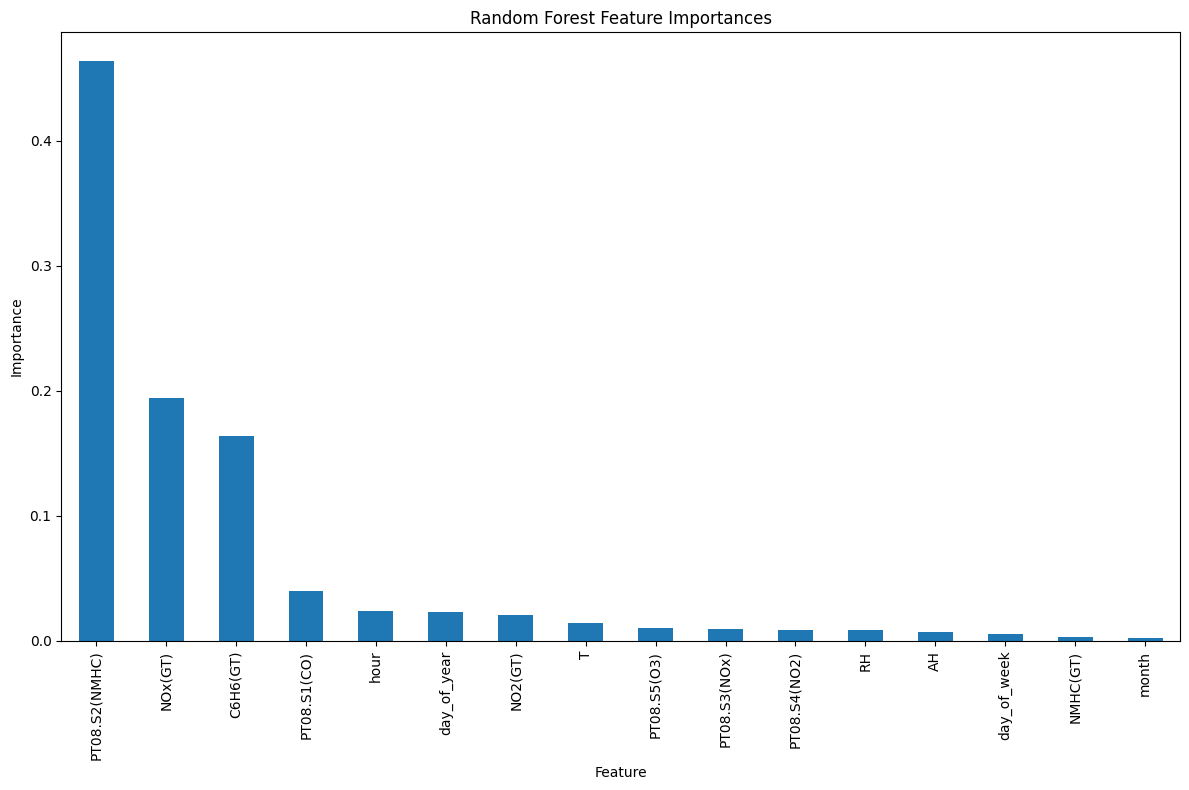

Feature importances calculated and visualized.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Extract feature importances from the trained rf_model
importances = rf_model.feature_importances_

# 2. Create a Pandas Series to store feature names and their corresponding importances
feature_importances = pd.Series(importances, index=X.columns)

# 3. Sort the features by importance in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# 4. Create a bar chart to visualize the sorted feature importances
plt.figure(figsize=(12, 8))
sorted_feature_importances.plot(kind='bar')

# 5. Label the x-axis as 'Feature' and the y-axis as 'Importance'
plt.xlabel('Feature')
plt.ylabel('Importance')

# 6. Add a title to the chart
plt.title('Random Forest Feature Importances')

# 7. Ensure the plot includes a legend if multiple elements are present or if a legend is necessary for clarity.
# For a single bar chart, a legend is not strictly necessary but can be added if desired.
# plt.legend() # Uncomment if a legend is needed, e.g., for multiple series

# 8. Display the plot
plt.tight_layout()
plt.show()

print("Feature importances calculated and visualized.")

## Final Task

### Subtask:
Provide a comprehensive summary of the Random Forest model's findings, performance, and insights from feature importance, directly addressing the specific requirements of your assignment tasks.


## Summary:

### Data Analysis Key Findings

*   The 'AirQuality.csv' dataset was successfully loaded, parsed with the correct semicolon delimiter, and preprocessed. This included handling numerical columns that used commas as decimal separators, replacing a specific missing value indicator (-200) with `NaN`, and removing irrelevant empty columns.
*   A new 'DateTime' column was created by combining 'Date' and 'Time'. Missing values in this column were handled using forward fill, while missing values in all other numerical columns were imputed with their respective means.
*   The target variable for the model was identified as 'CO(GT)'. Four new time-based features ('hour', 'day\_of\_week', 'month', 'day\_of\_year') were engineered from the 'DateTime' column to enhance the feature set.
*   The dataset was split into training and testing sets with an 80/20 ratio. The training set comprised 7576 samples, and the testing set contained 1895 samples, each with 16 features.
*   A Random Forest Regressor model was trained successfully using the preprocessed training data.
*   The model demonstrated strong predictive performance on the test set:
    *   An R-squared score of approximately 0.8757, indicating that about 87.57% of the variance in 'CO(GT)' can be explained by the model.
    *   A Mean Squared Error (MSE) of approximately 0.2196.
    *   A Root Mean Squared Error (RMSE) of approximately 0.4686.
*   A scatter plot visualizing actual versus predicted 'CO(GT)' values showed a strong positive correlation, with predictions closely aligning with actual values around the ideal prediction line.
*   Feature importance analysis was performed and visualized, successfully identifying the most influential variables contributing to the predictions of 'CO(GT)'.

### Insights or Next Steps

*   The Random Forest model provides a robust prediction mechanism for 'CO(GT)' based on the identified features, with a high R-squared value suggesting its utility for air quality analysis. Further investigation into the most important features identified could reveal key drivers of CO concentration.
*   To potentially enhance model performance and robustness, hyperparameter tuning of the Random Forest Regressor (e.g., optimizing `n_estimators`, `max_depth`, `min_samples_split`) should be considered. Additionally, exploring other advanced ensemble methods or time-series specific models could be beneficial given the temporal nature of the data.
